### Podatkovno rudarjenje, 1. domača naloga, 9. 3. 2018

# Priprava podatkov, osnovne statistike in vizualizacija

**Andraž Simčič**

Neizogiben del vsakega projekta na področju podatkovnega rudarjenja je iskanje,
urejanje in priprava podatkov. V tej nalogi boste spoznali primer podatkovne
zbirke in uporabili postopke za pretvorbo podatkov v ustrezno obliko ter pregled in prikaz
osnovnih statistik.

### Oddaja
Zapišite kodo in odgovore v spodnje celice. Tako pripravljen notebook shranite v vaš repozitorij za domače naloge na *github*. V učilnici oddajte le povezavo do notebooka v vašem repozitoriju, n.pr.: https://github.com/vašeuporabniškoime/PR18DNvz/dn1/poročilo.ipynb.

Za bolj podrobna navodila, glejte razdelek "Domače naloge" v [spletni učilnici predmeta](https://ucilnica.fri.uni-lj.si/course/view.php?id=37).

## Podatki

V nalogi boste pregledali in pripravili podatke gledanosti Hollywoodskih filmov
zbirke [MovieLens](https://grouplens.org/datasets/movielens/) v obdobju **1995-2016**. Podatke naložite iz [spletne učilnice](https://ucilnica.fri.uni-lj.si/mod/resource/view.php?id=19230).

Iste podatke boste uporabili v vseh domačih nalogah, zato jih dodobra spoznajte. Gre za podatkovno zbirko za
vrednotenje priporočilnih sistemov, ki vsebuje gledalce ter njihove ocene za posamezni film na lestvici 1 do 5.  
Poleg osnovne matrike uporabnikov in ocen vsebuje še dodatne podatke o filmih (npr. žanr, datum, oznake,
igralci).

Podatkovna zbirka vsebuje naslednje datoteke:

* ratings.csv: podatki o uporabnikih in ocenah,
* movies.csv: podatki o žanrih filmov,
* cast.csv: podatki o igralcih,
* tags.csv: podatki o oznakah (ang. \emph{tags}),
* links.csv: povezave na sorodne podatkovne zbirke.


Pred pričetkom reševanja naloge si dobro oglejte podatke in datoteko **README.txt**. Podrobnosti o zbirki lahko preberete na [spletni strani](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Pripravite metode za nalaganje podatkov v ustrezne podatkovne strukture. Te vam bodo prišle
prav tudi pri nadaljnjih nalogah.
Bodite pozorni na velikost podatkov.

In [2]:
# tu zapišite kodo za branje datotek in pripravo ustreznih matrik (in drugih struktur) podatkov,
# ki jih boste uporabi pri odgovarjanju na spodnja vprašanja

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#plt.style.use('PR.mplstyle')

from csv import DictReader;
#PREBERI ratings.csv
reader = DictReader(open('data/ratings.csv', 'rt', encoding='utf-8'));
rating = [];
rating.append([]);
rating.append([]);
rating.append([]);
rating.append([]);
for row in reader:
    rating[0].append(row["userId"]);
    rating[1].append(row["movieId"]);
    rating[2].append(row["rating"]);
    rating[3].append(row["timestamp"]);

#PREBERI cast.csv
reader = DictReader(open('data/cast.csv', 'rt', encoding='utf-8'));
cast = [];
cast.append([]);
cast.append([]);
for row in reader:
    cast[0].append(row["movieId"]);
    cast[1].append(row["cast"]);
    
#PREBERI movies.csv
reader = DictReader(open('data/movies.csv', 'rt', encoding='utf-8'));
movies = [];
movies.append([]);
movies.append([]);
movies.append([]);
for row in reader:
    movies[0].append(row["movieId"]);
    movies[1].append(row["title"]);
    movies[2].append(row["genres"]);
    
#PREBERI links.csv
reader = DictReader(open('data/links.csv', 'rt', encoding='utf-8'));
links = [];
links.append([]);
links.append([]);
links.append([]);
for row in reader:
    links[0].append(row["movieId"]);
    links[1].append(row["imdbId"]);
    links[2].append(row["tmdbId"]);

#PREBERI tags.csv
reader = DictReader(open('data/tags.csv', 'rt', encoding='utf-8'));
tags = [];
tags.append([]);
tags.append([]);
tags.append([]);
tags.append([]);
for row in reader:
    tags[0].append(row["userId"]);
    tags[1].append(row["movieId"]);
    tags[2].append(row["tag"]);
    tags[3].append(row["timestamp"]);


### LEGENDA
-----------
rating:
 - \[0\] userId
 - \[1\] movieId
 - \[2\] rating
 - \[3\] timestamp
 
cast:
 - \[0\] movieId
 - \[1\] cast

movies:
 - \[0\] movieId
 - \[1\] title
 - \[2\] genres

links:
 - \[0\] movieId
 - \[1\] imdbId
 - \[2\] tmdbId

tags:
 - \[0\] userId
 - \[1\] movieId
 - \[2\] tag
 - \[3\] timestamp


## Vprašanja

Glavni namen podatkovnega rudarjenja je *odkrivanje znanj iz podatkov*,
torej odgovarjanje na vprašanja z uporabo računskih postopkov.

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne implementacija vaše rešitve.

### 1. vprašanje (15%):
Kateri filmi so v povprečju najbolje ocenjeni?  Pripravite seznam
filmov ter njihovih povprečnih ocen in izpišite po 10 filmov z vrha seznama.
Opazite pri takem ocenjevanju kakšno težavo? Kako bi jo lahko rešili? Kakšni so
rezultati tedaj?

In [5]:
# PRIPRAVA PODATKOV
# moviesAvgRating: [0]...MovieId, [1]...AvgRating, [2]...number of adds
moviesAvgRating = [];
moviesAvgRating.append([]);
moviesAvgRating.append([]);
moviesAvgRating.append([]);

for i in movies[0]:
    moviesAvgRating[0].append(i);
    moviesAvgRating[1].append(0);
    moviesAvgRating[2].append(0);

for i in range(0,len(rating[1])):
    #print("gledamo {}".format(rating[1][i], moviesAvgRating[0]));
    #tmpIndex = moviesAvgRating[0].index(rating[1][i]) if rating[1][i] in moviesAvgRating[0] else -1
    #print(tmpIndex)
    if rating[1][i] in moviesAvgRating[0]:
        #print(rating[1][i]);
        tmpIndex = moviesAvgRating[0].index(rating[1][i]);
        #print(tmpIndex);
        moviesAvgRating[1][tmpIndex] += float(rating[2][i]);
        moviesAvgRating[2][tmpIndex] += 1;

for i in range(0,len(moviesAvgRating[2])):
    if (moviesAvgRating[2][i] != 0):
        moviesAvgRating[1][i] /= float(moviesAvgRating[2][i]);

#moviesAvgRating[1]
print("Obdelava koncana!")
        

Obdelava koncana!


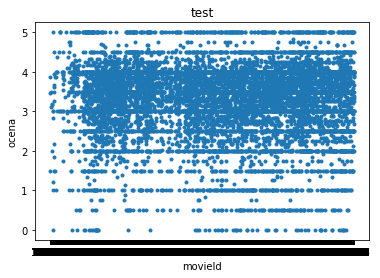

In [7]:
# OBDELAVA PODATKOV
plt.figure();
plt.plot(moviesAvgRating[0],moviesAvgRating[1], '.');
plt.xlabel('movieId');
plt.ylabel('ocena');
plt.title('test');

Odgovor: **zapišite odgovor**

### 2. vprašanje (15%):
Posamezni film pripada enemu ali več žanrom. 
Koliko je vseh žanrov? Prikaži porazdelitev žanrov z uporabo ustrezne
vizualizacije.

In [4]:
# kodo lahko razdelite v več celic

Odgovor: **zapišite odgovor**

### 3. vprašanje (20%):
Število ocen (ogledov) se za posamezni film razlikuje. Ali
obstaja povezava med gledanostjo in povprečno oceno filma? Opišite postopek, ki
ste ga uporabili pri odgovarjanju na vprašanje.

In [5]:
# kodo lahko razdelite v več celic

Odgovor: **zapišite odgovor**

### 4. vprašanje (30%):
Vsaka ocena je bila vnešena na določen datum (stolpec
*timestamp*).  Ali se popularnost posameznih filmov s časom spreminja?
Problem reši tako, da za dani film ocene razporediš po času ter v vsaku časovni
točki izračunaš povprečje za zadnjih 30, 50, ali 100 ocen. Nariši graf, kako se
ocena spreminja in ga prikaži za dva zanimiva primera filmov.

In [6]:
# kodo lahko razdelite v več celic

Odgovor: **zapišite odgovor**

### 5. vprašanje (20%):
Kako bi ocenili popularnost posameznih igralcev? Opišite postopek
ocenitve ter izpišite 10 najbolj popularnih igralcev.

In [7]:
# kodo lahko razdelite v več celic

Odgovor: **zapišite odgovor**

### bonus vprašanje (5%):

Kateri je tvoj najljubši film? Zakaj?

Odgovor: **zapišite odgovor**

## Zapiski
Za nalaganje podatkov lahko uporabite vgrajen modul `csv`. Mapa s podatki `ml-latest-small` se v tem primeru mora nahajati v isti mapi kot notebook.

In [1]:
from csv import DictReader

reader = DictReader(open('ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

FileNotFoundError: [Errno 2] No such file or directory: 'ml-latest-small/ratings.csv'

Podatki v zadnji vrstici datoteke:

In [9]:
user, movie, rating, timestamp

('671', '6565', '3.5', '1074784724')

Pretvorba časovnega formata (*Unix time*). Kode za oblikovanje so navedene v dokumentaciji modula [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [10]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts

'2008-08-05 02:56'